In [46]:
import os, io
import configparser
import PIL
import IPython
import numpy as np

In [47]:
class Config:
    DEFAULTS = dict(
        kernel_size=32,
        kernel_initial_complexity=0.1,
        kernel_match_threshold=0.5,
        grid_size=16,
        grid_score_threshold=0.1,
        dataset_source='dataset_source/101_ObjectCategories',
        dataset_path='dataset',
        dataset_sample_count=1000
    )
    
    def __init__(self):
        super()
        self.reload()

    def reload(self):
        config = configparser.ConfigParser(defaults=type(self).DEFAULTS)

        if os.path.exists('config.txt'):
            config.read('config.txt')

        def_section = config['DEFAULT']
        
        for k in def_section:
            typ = type(type(self).DEFAULTS[k]) # enforce proper type (e.g. kernel_size must by int, not string)
            setattr(self, k, typ(def_section[k]))

In [48]:
def pil_image_to_2d_bytes(image):
    assert image.width == image.height

    if image.mode != 'L' and image.mode != '1':
        assert False, f'Unsupported mode {image.mode}'

    l_image = image if image.mode == 'L' else image.convert('L')
    arr = np.frombuffer(l_image.tobytes(), dtype=np.uint8)
    rv = arr.reshape(l_image.width, l_image.width)
    return rv if image.mode == 'L' else (rv / 255).astype(np.uint8)

In [49]:
# from https://gist.github.com/parente/691d150c934b89ce744b5d54103d7f1e
def _src_from_data(data):
    """Base64 encodes image bytes for inclusion in an HTML img element"""
    img_obj = IPython.display.Image(data=data)
    for bundle in img_obj._repr_mimebundle_():
        for mimetype, b64value in bundle.items():
            if mimetype.startswith('image/'):
                return f'data:{mimetype};base64,{b64value}'

def display_images(images, captions=None, row_height='auto'):
    figures = []
    
    for image in images:
        if isinstance(image, bytes) or isinstance(image, PIL.Image.Image):
            if isinstance(image, bytes):
                bts = image
            else:
                b = io.BytesIO()
                image.save(b, format='PNG')
                bts = b.getvalue()
            
            src = _src_from_data(bts)
        else:
            src = image
            #caption = f'<figcaption style="font-size: 0.6em">{image}</figcaption>'

        caption = ''
        
        if captions:
            caption = captions[id(image)]

            if caption:
                caption = f'<figcaption style="font-size: 0.6em">{caption}</figcaption>'
        
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="{src}" style="height: {row_height}">
              {caption}
            </figure>
        ''')
    return IPython.display.HTML(data=f'''
        <div style="display: flex; flex-flow: row wrap; text-align: center;">
        {''.join(figures)}
        </div>
    ''')

def display_images_grid(images, col_count, col_width=None, captions=None):
    figures = []
    
    for image in images:
        assert isinstance(image, bytes) or isinstance(image, PIL.Image.Image)

        if isinstance(image, bytes):
            bts = image
        else:
            b = io.BytesIO()
            image.save(b, format='PNG')
            bts = b.getvalue()
        
        src = _src_from_data(bts)

        caption = ''
        
        if captions:
            caption = captions[id(image)]

            if caption:
                caption = f'<figcaption style="font-size: 0.6em">{caption}</figcaption>'
        
        figures.append(f'''
            <figure style="margin: 5px !important;">
              <img src="{src}" style="height: auto">
              {caption}
            </figure>
        ''')

    if not col_width:
        if len(images) > 0 and isinstance(images[0], PIL.Image.Image):
            col_width = images[0].width

    if not col_width: 
        col_width='auto'
    else:
        col_width = f'{col_width}px'
        
    return IPython.display.HTML(data=f'''<div style="
        display: grid; 
        grid-template-columns: repeat({col_count}, {col_width});
        column-gap: 1px;
        row-gap: 1px;">
        {''.join(figures)}
    </div>''')


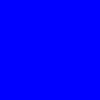
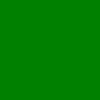
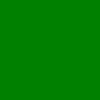
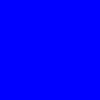
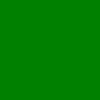
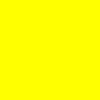
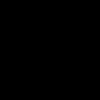
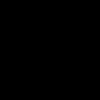
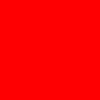
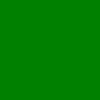
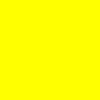
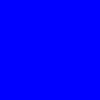
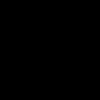
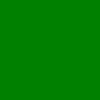
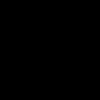
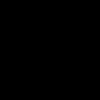

In [50]:
from PIL import Image, ImageDraw
import numpy as np
colors = ['red', 'green', 'blue', 'black', 'yellow' ]
images = [ Image.new('RGB', (100, 100), color=colors[np.random.randint(len(colors))]) for i in range(16) ]
display_images_grid(images, 4, 70)